In [1]:
import torch
import torchvision as tv
from torchvision.transforms import transforms

import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

from acflow import RealNVP

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [2]:
batch_size = 1
def get_mnist(batch_size):
  transform = transforms.Compose(
    [
      transforms.ToTensor(),
      transforms.Normalize((0.1307,), (0.30811,))
    ]
  )

  train_set = tv.datasets.MNIST(
    '../data/', train=True, download=True, transform=transform
  )
  test_set = tv.datasets.MNIST(
    '../data/', train=False, download=True, transform=transform
  )

  train_loader = torch.utils.data.DataLoader(
    train_set, batch_size
  )
  test_loader = torch.utils.data.DataLoader(
    test_set, batch_size
  )

  return train_loader, test_loader, train_set, test_set
train_loader, test_loader, train_set, test_set = get_mnist(batch_size)

In [3]:
layers = 32

model = RealNVP(
  1, 5, layers, 10, (1,28,28), device, 10
).to(device)

In [10]:
for x,y in train_loader:
  
  x = x.to(device)
  x2 = x

  # for i, flow in enumerate(model.flows):
  #   x, det = flow.f(x,  i%2 + (-1)**i * model.mask)
  #   print(torch.mean(x), torch.mean(det))
  # print(f'{x=}')
  ll = model.prior.log_prob(x.view(x.size(0), -1))
  print(f'{ll=}')
  loss = torch.log(-ll)
  print(f'{loss=}')
  break

ll=tensor([-156403.0781], device='cuda:0', grad_fn=<LogsumexpBackward>)
loss=tensor([11.9602], device='cuda:0', grad_fn=<LogBackward>)


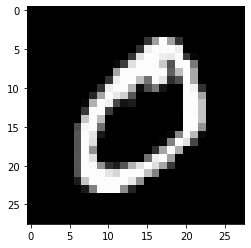

In [11]:
x1 = train_set[1]
plt.imshow(x1[0][0], cmap='gray')
plt.show()

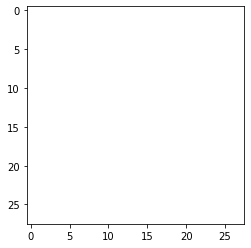

In [13]:
z1, det = model(x1[0].to(device))
plt.imshow(z1.cpu().detach().numpy()[0][0], cmap='gray')
plt.show()

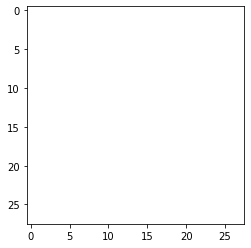

In [14]:
x2 = model.reverse(z1)
plt.imshow(x2.cpu().detach().numpy()[0][0], cmap='gray')
plt.show()

In [15]:
np.linalg.norm(x1[0].cpu().detach().numpy()[0][0] - x2.cpu().detach().numpy()[0][0])

nan

In [16]:
print(x2)

tensor([[[[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
           nan, nan, nan, nan, nan],
          [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
           nan, nan, nan, nan, nan],
          [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
           nan, nan, nan, nan, nan],
          [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
           nan, nan, nan, nan, nan],
          [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
           nan, nan, nan, nan, nan],
          [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
           nan, nan, nan, nan, nan],
          [nan, nan, n